In [104]:
#Importing libraries
import pandas as pd
import re
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

In [72]:
# Importing the data
reviews = pd.read_csv('goodreads_reviews.csv')
works = pd.read_csv('goodreads_works.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16256\506053560.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('goodreads_reviews.csv')


In [73]:
works.head()

,work_id,isbn,isbn13,original_title,author,original_publication_year,num_pages,description,genres,image_url,reviews_count,text_reviews_count,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,ratings_count,avg_rating,similar_books
0,2919130,1416534601,9.781417e+12,Nocturnes,John Connolly,2004.0,NaN,NaN,"fiction, fantasy, paranormal, mystery, thrille...",https://s.gr-assets.com/assets/nophoto/book/11...,8820,338,1118,1601,1029,190,58,3996,3.9,NaN
1,52087333,NaN,NaN,Draw Play,Tia Lewis,2016.0,NaN,Jake:\nI can't believe my coach assigned me a ...,"romance, fiction",https://s.gr-assets.com/assets/nophoto/book/11...,2482,204,204,353,274,77,29,937,3.7,NaN
2,1649583,1416505520,9.781417e+12,Citizen of the Galaxy,Robert A. Heinlein,1957.0,NaN,"In a distant galaxy, the atrocity of slavery w...","fiction, young-adult, fantasy, paranormal, chi...",https://s.gr-assets.com/assets/nophoto/book/11...,16506,447,3539,4351,2863,444,53,11250,4.0,NaN
3,688299,0060541830,9.780061e+12,Congo,Michael Crichton,1980.0,NaN,"Deep in the African rain forest, near the lege...","fiction, mystery, thriller, crime, fantasy, pa...",https://s.gr-assets.com/assets/nophoto/book/11...,170916,1633,25081,45775,48505,14001,2926,136288,3.6,NaN
4,3464264,0451528824,9.780452e+12,Anne of Green Gables,L.M. Montgomery,1908.0,NaN,"Everyone's favorite redhead, the spunky Anne S...","fiction, young-adult, children, history, histo...",https://s.gr-assets.com/assets/nophoto/book/11...,743392,14586,272952,161856,81578,19933,9099,545418,4.2,NaN


In [74]:
reviews.head()

,review_id,user_id,work_id,started_at,read_at,date_added,rating,review_text,n_votes,n_comments
0,fa7a00c01296e3b2b2e857d79c51ea77,3693bb4f1062b659a354848cf11ca313,6128277,NaN,NaN,2013-12-21 00:00:00.000,5.0,Fire is half-human and half monster. Monsters ...,0,0
1,de0f7c8d15e247443e51969becf2878e,3693bb4f1062b659a354848cf11ca313,3270810,NaN,NaN,2013-12-21 00:00:00.000,5.0,Katsa is a graceling - blessed with an ability...,0,0
2,e79b49504ef58b2defcdc8b79e2ec3fb,3693bb4f1062b659a354848cf11ca313,4768235,NaN,NaN,2013-12-19 00:00:00.000,5.0,"This is a fun, light-hearted read. Tammy Jo is...",0,0
3,495c1210a9dbd819cbf7717dfb8b217f,3693bb4f1062b659a354848cf11ca313,6264661,NaN,NaN,2013-12-16 00:00:00.000,5.0,"Cassel, was a character that I was looking for...",0,0
4,54fcd8963c9dd56485d2a4ad152699c2,3693bb4f1062b659a354848cf11ca313,3429537,NaN,NaN,2013-12-16 00:00:00.000,5.0,This is kind of one of those books that I saw ...,0,0


In [75]:
# Combine the two datasets on the work_id columns
data = pd.merge(reviews,works, on = 'work_id', how = 'outer')

In [76]:
data.head()

,review_id,user_id,work_id,started_at,read_at,date_added,rating,review_text,n_votes,n_comments,...,reviews_count,text_reviews_count,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,ratings_count,avg_rating,similar_books
0,3983474ce14ea5c5682f2d321012358d,db2b9d195f520de5812ca657ffb00367,104,NaN,NaN,2011-06-10 00:00:00.000,5.0,I've loved everything from Isabel Allende but ...,0,0,...,29507,1492,5232,7013,4270,993,253,17761,3.9,NaN
1,794eb4f8bc56b89bbcf37a2eb3170438,cef6f29ce836260e6f6cb11d27f7faae,104,NaN,2009-06-20 00:00:00.000,2009-06-17 00:00:00.000,5.0,Beautifully written! Ines of my Soul is not ju...,0,0,...,29507,1492,5232,7013,4270,993,253,17761,3.9,NaN
2,b9b5e1f2bc291564945e34831dfc16db,24d04e3d0b2fe7ef8366de93618eb904,104,NaN,2015-04-12 00:00:00.000,2015-04-12 00:00:00.000,3.0,While I did very much enjoy the historical asp...,0,0,...,29507,1492,5232,7013,4270,993,253,17761,3.9,NaN
3,70bb37361f727595b0cfefac285cb1fe,694e53b0b1a1b2fa52e661aec6092d02,104,NaN,2011-05-08 00:00:00.000,2011-05-13 00:00:00.000,3.0,Read like a hybrid memoir/historical fiction.,0,0,...,29507,1492,5232,7013,4270,993,253,17761,3.9,NaN
4,3d8197a9ce517c81ab815c11bcc19e24,1af836d548191917d8906dedc8ded0c9,104,NaN,2007-12-16 00:00:00.000,2007-10-15 00:00:00.000,3.0,Actually. . .book club snuck up on me this mon...,0,0,...,29507,1492,5232,7013,4270,993,253,17761,3.9,NaN


In [77]:
data.columns

Index(['review_id', 'user_id', 'work_id', 'started_at', 'read_at',
       'date_added', 'rating', 'review_text', 'n_votes', 'n_comments', 'isbn',
       'isbn13', 'original_title', 'author', 'original_publication_year',
       'num_pages', 'description', 'genres', 'image_url', 'reviews_count',
       'text_reviews_count', '5_star_ratings', '4_star_ratings',
       '3_star_ratings', '2_star_ratings', '1_star_ratings', 'ratings_count',
       'avg_rating', 'similar_books'],
      dtype='object')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143887 entries, 0 to 1143886
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   review_id                  1143887 non-null  object 
 1   user_id                    1143887 non-null  object 
 2   work_id                    1143887 non-null  int64  
 3   started_at                 796392 non-null   object 
 4   read_at                    1031765 non-null  object 
 5   date_added                 1143887 non-null  object 
 6   rating                     1106569 non-null  float64
 7   review_text                1143887 non-null  object 
 8   n_votes                    1143887 non-null  int64  
 9   n_comments                 1143887 non-null  int64  
 10  isbn                       997980 non-null   object 
 11  isbn13                     1015908 non-null  float64
 12  original_title             1143887 non-null  object 
 13  author      

In [79]:
# Drop irrelevant columns
data.drop(['isbn','isbn13', 'started_at', 'read_at', 'similar_books', 
'review_id', 'n_votes', 'n_comments', 'reviews_count', 'date_added', 
'5_star_ratings', '4_star_ratings', '3_star_ratings',
 '2_star_ratings', '1_star_ratings'], axis =1, inplace=True)

In [80]:
# Check for missing data
data.isna().sum()

user_id                          0
work_id                          0
rating                       37318
review_text                      0
original_title                   0
author                           0
original_publication_year      342
num_pages                    27168
description                   4696
genres                           0
image_url                        0
text_reviews_count               0
ratings_count                    0
avg_rating                       0
dtype: int64

In [81]:
#Dropping all the missing values
data.dropna(inplace=True)

In [82]:
#Check for duplicates
data.duplicated().sum()

196

In [83]:
#Drop duplicated columns
data.drop_duplicates(inplace=True)

In [84]:
data.head(10)

,user_id,work_id,rating,review_text,original_title,author,original_publication_year,num_pages,description,genres,image_url,text_reviews_count,ratings_count,avg_rating
0,db2b9d195f520de5812ca657ffb00367,104,5.0,I've loved everything from Isabel Allende but ...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9
1,cef6f29ce836260e6f6cb11d27f7faae,104,5.0,Beautifully written! Ines of my Soul is not ju...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9
2,24d04e3d0b2fe7ef8366de93618eb904,104,3.0,While I did very much enjoy the historical asp...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9
3,694e53b0b1a1b2fa52e661aec6092d02,104,3.0,Read like a hybrid memoir/historical fiction.,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9
4,1af836d548191917d8906dedc8ded0c9,104,3.0,Actually. . .book club snuck up on me this mon...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9
5,1952f1237c343df6e73ba8cccfda5a57,104,4.0,Allende is a wonderful writer and the first ha...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9
6,8a90df74baddd5593af8c406be539e94,104,4.0,Isabel Allende does a good job of weaving an e...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9
7,2a5136756f05aa8df414f127782f6939,104,3.0,"I was really looking forward to reading this, ...",Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9
8,244ea8d93ae2c372488805378de50f2c,104,3.0,I don't know much about South American history...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9
9,0ce8f21524e7485990d0b1851c863fe0,104,3.0,Ines of My Soul is a fictionalized account of ...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9


In [85]:
data['genres'] = data['genres'].fillna("")
data['genre_list'] = data['genres'].str.split(",").apply(lambda genres: [g.strip() for g in genres if g.strip()])

In [86]:
data['genres']

0          fiction, history, historical fiction, biograph...
1          fiction, history, historical fiction, biograph...
2          fiction, history, historical fiction, biograph...
3          fiction, history, historical fiction, biograph...
4          fiction, history, historical fiction, biograph...
                                 ...                        
1143882    fantasy, paranormal, romance, mystery, thrille...
1143883    fantasy, paranormal, romance, mystery, thrille...
1143884    fantasy, paranormal, romance, mystery, thrille...
1143885    fantasy, paranormal, romance, mystery, thrille...
1143886    fantasy, paranormal, romance, mystery, thrille...
Name: genres, Length: 1075836, dtype: object

## Rating Distribution from reviews

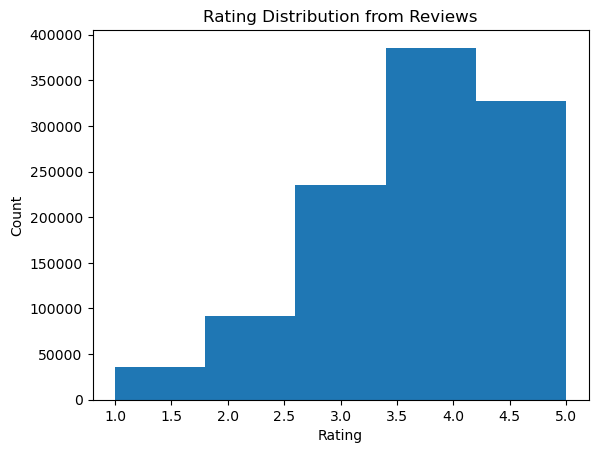

In [87]:
plt.figure()
plt.hist(data['rating'].dropna(), bins=5)
plt.title("Rating Distribution from Reviews")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

## Average rating by genre

In [88]:
books = data.drop_duplicates(subset='work_id')
books_exploded = books.explode('genre_list')
avg_by_genre = books_exploded.groupby('genre_list')['avg_rating'].mean().sort_values(ascending=False)

In [89]:
top_genre = avg_by_genre.head(10).reset_index().rename(columns ={'genre_list': 'Genre', 'avg_rating':'Avg Rating'})
top_genre

,Genre,Avg Rating
0,comics,4.021705
1,graphic,4.021705
2,children,3.978505
3,non-fiction,3.937409
4,fantasy,3.933309
5,paranormal,3.933309
6,poetry,3.925153
7,romance,3.923063
8,fiction,3.916068
9,crime,3.909078


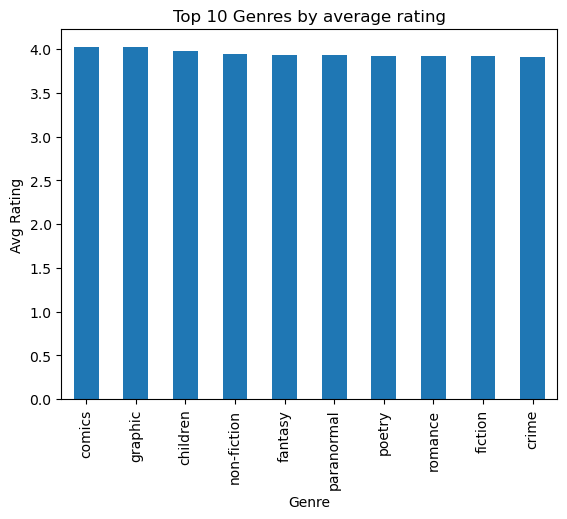

In [90]:
# Visualization
top_genre.set_index('Genre')['Avg Rating'].plot(kind='bar')
plt.title('Top 10 Genres by average rating')
plt.xlabel('Genre')
plt.ylabel('Avg Rating')
plt.show()

## Top authos by sum of rating counts

In [91]:
author_rating = data.groupby('author')['ratings_count'].sum().sort_values(ascending=False)
top_authors = author_rating.head(10).reset_index().rename(columns={'author':'Author', 'ratings_count': 'Total Ratings'})
top_authors

,Author,Total Ratings
0,Suzanne Collins,22284632923
1,J.K. Rowling,20866245630
2,John Green,10528196766
3,Veronica Roth,10494362674
4,Stephenie Meyer,7255670524
5,Cassandra Clare,6102855410
6,Rick Riordan,4329350973
7,Gillian Flynn,4262390134
8,George R.R. Martin,3540105200
9,Harper Lee,3081831269


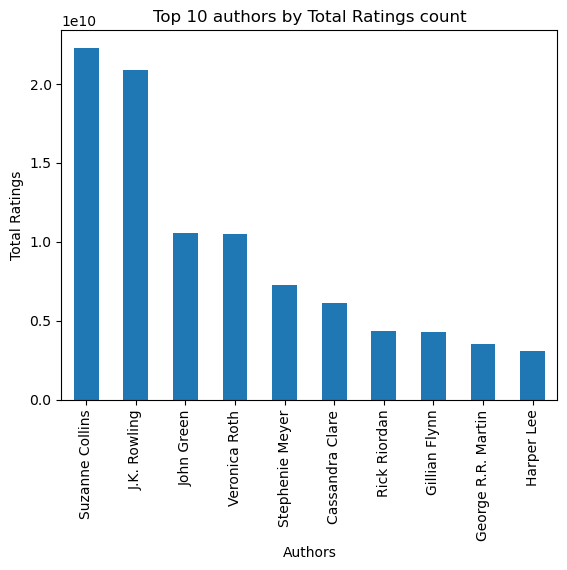

In [92]:
# Visualization
top_authors.set_index('Author')['Total Ratings'].plot(kind='bar')
plt.title('Top 10 authors by Total Ratings count')
plt.xlabel('Authors')
plt.ylabel('Total Ratings')
plt.show()

# Content Based Filtering

In [93]:
unique_books = data.drop_duplicates(subset='original_title')

In [94]:
unique_books

,user_id,work_id,rating,review_text,original_title,author,original_publication_year,num_pages,description,genres,image_url,text_reviews_count,ratings_count,avg_rating,genre_list
0,db2b9d195f520de5812ca657ffb00367,104,5.0,I've loved everything from Isabel Allende but ...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9,"[fiction, history, historical fiction, biograp..."
12,fb0c4cb9d0ffaf7c8fd4948703137ddb,114,4.0,3.5 stars - loved how dense and detailed it was.,The Far Pavilions,M.M. Kaye,1978.0,958.0,A magnificent romantic/historical/adventure no...,"fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1085,35045,4.2,"[fiction, history, historical fiction, biograp..."
38,55475556ab32863fed66cb94a404af71,115,5.0,I don't want to even talk about this or I will...,Where the Red Fern Grows,Wilson Rawls,1961.0,272.0,"A loving threesome, they ranged the dark hills...","fiction, young-adult, children, history, histo...",https://images.gr-assets.com/books/1166154337m...,8913,283953,4.0,"[fiction, young-adult, children, history, hist..."
135,29a670c6335520042f46f68e60c74e12,423,5.0,classic space opera; important for taking into...,The Forever War,Joe Haldeman,1974.0,278.0,"Series Info:\nThis is the first part of the ""F...","fiction, fantasy, paranormal",https://images.gr-assets.com/books/1386852511m...,4461,104415,4.1,"[fiction, fantasy, paranormal]"
307,bd7e3efea581ed4f254555d0dcfa853b,434,4.0,Another great noir crime novel by James Ellroy...,The Black Dahlia,James Ellroy,1987.0,348.0,"On January 15, 1947, the tortured body of a be...","mystery, thriller, crime, fiction, history, hi...",https://images.gr-assets.com/books/1387048173m...,2011,66834,3.8,"[mystery, thriller, crime, fiction, history, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143689,1bdeed28211d51fc7dd59cc3c60c64db,56947505,2.0,Skimmed the book. They were kind of boring. I ...,So Good,Nicola Rendell,2017.0,280.0,"On the roof of a house outside Truelove, Maine...","romance, fiction",https://s.gr-assets.com/assets/nophoto/book/11...,272,854,4.0,"[romance, fiction]"
1143743,cb8cab27b0358f2dad205f0daf73742f,57400201,4.0,4.5 / 5 Stars \n I've always loved this author...,Be My Best Man,Con Riley,2017.0,316.0,~ Will Jason's third time as a best man lead t...,romance,https://images.gr-assets.com/books/1504354200m...,90,310,4.1,[romance]
1143769,58506fb84e89988a8ca7336d1aad11e5,57414860,3.0,"Slightly dragging, so makes it difficult to em...",From This Moment,Melanie Harlow,2017.0,352.0,It was like seeing a ghost.\nWhen my late husb...,"romance, fiction",https://images.gr-assets.com/books/1502411206m...,463,1951,4.1,"[romance, fiction]"
1143803,33aa600323b393b3594cc638bf318919,57646853,2.0,"Maybe it's because I've been around the ""roman...",Ghosted,J.M. Darhower,2017.0,452.0,"He's a troubled young actor, Hollywood's newes...","romance, fiction",https://images.gr-assets.com/books/1503089054m...,856,7569,4.1,"[romance, fiction]"


In [95]:
data.columns

Index(['user_id', 'work_id', 'rating', 'review_text', 'original_title',
       'author', 'original_publication_year', 'num_pages', 'description',
       'genres', 'image_url', 'text_reviews_count', 'ratings_count',
       'avg_rating', 'genre_list'],
      dtype='object')

In [96]:
# If you have 'genre_list' as list, join it first:
unique_books['genre_string'] = unique_books['genre_list'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else x
)

# Create better combined features:
unique_books['Combined features'] = (
    unique_books['genre_string'] + ' ' +
    unique_books['genre_string'] + ' ' +   # repeat for weight
    unique_books['original_title'] + ' ' +  # add title
    unique_books['author'] + ' ' +
    unique_books['review_text'] + ' '+
    unique_books['description'].str[:200]   # trim description
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16256\1972929986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_books['genre_string'] = unique_books['genre_list'].apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_16256\1972929986.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_books['Combined features'] = (


In [97]:
#Intitalize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=5)
tfidf_matrix =vectorizer.fit_transform(unique_books['Combined features'])

In [98]:
content_nn = NearestNeighbors(metric='cosine', algorithm='brute')
content_nn.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [99]:

def preprocess_text(text):
    """
    Clean and normalize book titles.
    """
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Recommend Function

def recommend(title, books_df, vectorizer, nn_model, tfidf_matrix, n_neighbors=5):
    # Step 1: Preprocess input title
    clean_title = preprocess_text(title)
    
    # Step 2: Ensure there's a clean_title column in DataFrame
    if 'clean_title' not in books_df.columns:
        books_df['clean_title'] = books_df['original_title'].apply(preprocess_text)
    
    # Step 3: Find matching book
    match = books_df[books_df['clean_title'] == clean_title]
    
    if match.empty:
        print(f"\n Book not found: '{title}'\n")
        print("Try one of these sample titles:")
        print(books_df['original_title'].sample(5).to_list())
        return None

    # Step 4: Get index of the book
    book_idx = match.index[0]
    row_number = books_df.index.get_loc(book_idx)

    # Step 5: Get the TF-IDF vector and find neighbors
    tfidf_vector = tfidf_matrix[row_number]
    distances, indices = nn_model.kneighbors(tfidf_vector, n_neighbors=n_neighbors+1)

    # Step 6: Retrieve similar books (skip the first which is the book itself)
    recommended_indices = indices.flatten()[1:]
    recommended_books = books_df.iloc[recommended_indices][[
        'original_title', 'author', 'description', 'image_url', 'avg_rating', 'genre_list'
    ]].copy()

    # Fix: Convert genre_list to string before drop_duplicates
    recommended_books['genre_list'] = recommended_books['genre_list'].apply(
        lambda x: ', '.join(x) if isinstance(x, list) else str(x)
    )

    return recommended_books.drop_duplicates()


# EXAMPLE USAGE


# Replace this with your actual input
favorite_title = input("Enter a book title you liked: ")



recommendations = recommend(
    favorite_title,
    unique_books,
    vectorizer,
    content_nn,
    tfidf_matrix,
    n_neighbors=5
)

# Show the recommendations
if recommendations is not None:
    print("\n Here are some recommended books:\n")
    print(recommendations[['original_title', 'author', 'avg_rating']])



 Here are some recommended books:

                 original_title             author  avg_rating
1127923   The Collapsing Empire        John Scalzi         4.1
913157        More Than Forever         Jay McLean         4.5
165743            House of Suns  Alastair Reynolds         4.2
156853   The War of the Flowers       Tad Williams         3.9
1010142            Slow Bullets  Alastair Reynolds         3.6


C:\Users\Admin\AppData\Local\Temp\ipykernel_16256\4054554657.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_df['clean_title'] = books_df['original_title'].apply(preprocess_text)


In [100]:
data.head()

,user_id,work_id,rating,review_text,original_title,author,original_publication_year,num_pages,description,genres,image_url,text_reviews_count,ratings_count,avg_rating,genre_list
0,db2b9d195f520de5812ca657ffb00367,104,5.0,I've loved everything from Isabel Allende but ...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9,"[fiction, history, historical fiction, biograp..."
1,cef6f29ce836260e6f6cb11d27f7faae,104,5.0,Beautifully written! Ines of my Soul is not ju...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9,"[fiction, history, historical fiction, biograp..."
2,24d04e3d0b2fe7ef8366de93618eb904,104,3.0,While I did very much enjoy the historical asp...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9,"[fiction, history, historical fiction, biograp..."
3,694e53b0b1a1b2fa52e661aec6092d02,104,3.0,Read like a hybrid memoir/historical fiction.,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9,"[fiction, history, historical fiction, biograp..."
4,1af836d548191917d8906dedc8ded0c9,104,3.0,Actually. . .book club snuck up on me this mon...,Ines del alma mia,Isabel Allende,2006.0,321.0,"Born into a poor family in Spain, Ines, a seam...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,1492,17761,3.9,"[fiction, history, historical fiction, biograp..."


In [107]:
# Export the PKL files
with open("unique_books.pkl", "wb") as f:
    pickle.dump(unique_books, f)

# Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Tfidf_matrix
with open("tfidf_matrix.pkl", "wb") as f:
    pickle.dump(tfidf_matrix, f)

# Contente nearest neigbor
with open("content_nn.pkl", "wb") as f:
    pickle.dump(content_nn, f)

# Save the unique books dataframe
unique_books.to_pickle("book_df.pkl")